In [145]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
from wordcloud import WordCloud, STOPWORDS
from stopwords import get_stopwords

castles = pd.read_csv('data/castelli.csv', delimiter='|', encoding='ISO-8859-1')
bibliography = pd.read_csv('data/bibliografia.csv', delimiter='|', encoding='ISO-8859-1')
events = pd.read_csv('data/vicende.csv', delimiter='|', encoding='ISO-8859-1')

## merge.csv

In [171]:
merged_bibliography_events = events.merge(bibliography, on='IdBibliografia', how='inner')
merged = castles.merge(merged_bibliography_events, on='IdCastello', how='inner')
print(merged.head())

   IdCastello   IdVeteroDb_x IdRifVeteroDb_x Castello  NumeroSullaCarta  \
0         258  Faenza-Oriolo             FA1   Oriolo              51.0   
1         258  Faenza-Oriolo             FA1   Oriolo              51.0   
2         258  Faenza-Oriolo             FA1   Oriolo              51.0   
3         258  Faenza-Oriolo             FA1   Oriolo              51.0   
4         258  Faenza-Oriolo             FA1   Oriolo              51.0   

   EsistenzaDubbia Toponimo  IdProvincia  Comune Localita  ...  Sede Annata  \
0                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   
1                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   
2                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   
3                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   
4                0   Oriolo            9  Faenza   Oriolo  ...   NaN    NaN   

  LuogoPubblicazione  Anno CuratoreEdizione  CasaEditrice ISBN Pagine  \
0

In [172]:
print(merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38462 entries, 0 to 38461
Data columns (total 62 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdCastello               38462 non-null  int64  
 1   IdVeteroDb_x             38462 non-null  object 
 2   IdRifVeteroDb_x          38462 non-null  object 
 3   Castello                 38462 non-null  object 
 4   NumeroSullaCarta         37686 non-null  float64
 5   EsistenzaDubbia          38462 non-null  int64  
 6   Toponimo                 14852 non-null  object 
 7   IdProvincia              38462 non-null  int64  
 8   Comune                   38462 non-null  object 
 9   Localita                 36933 non-null  object 
 10  Localizzazione           35295 non-null  float64
 11  RifCTR                   9930 non-null   object 
 12  RifIGM                   7189 non-null   object 
 13  CondizioniAttuali        22884 non-null  float64
 14  UsoAttuale            

In [173]:
merged = merged.drop([
    'IdVeteroDb_x',
    'IdRifVeteroDb_x',
    'IdVeteroDb_y',
    'IdRifVeteroDb_y',
    'IdBibliografiaProvv',
    'RifFotoAerea',
    'DescrizioneOpera',
    'Pieve',
    'Parrocchia',
    'CostruzioniNeomedievali',
    'EdizioniSuccessive',
    'DistrettoCivile',
    'Planimetria'
], axis=1)

<Axes: >

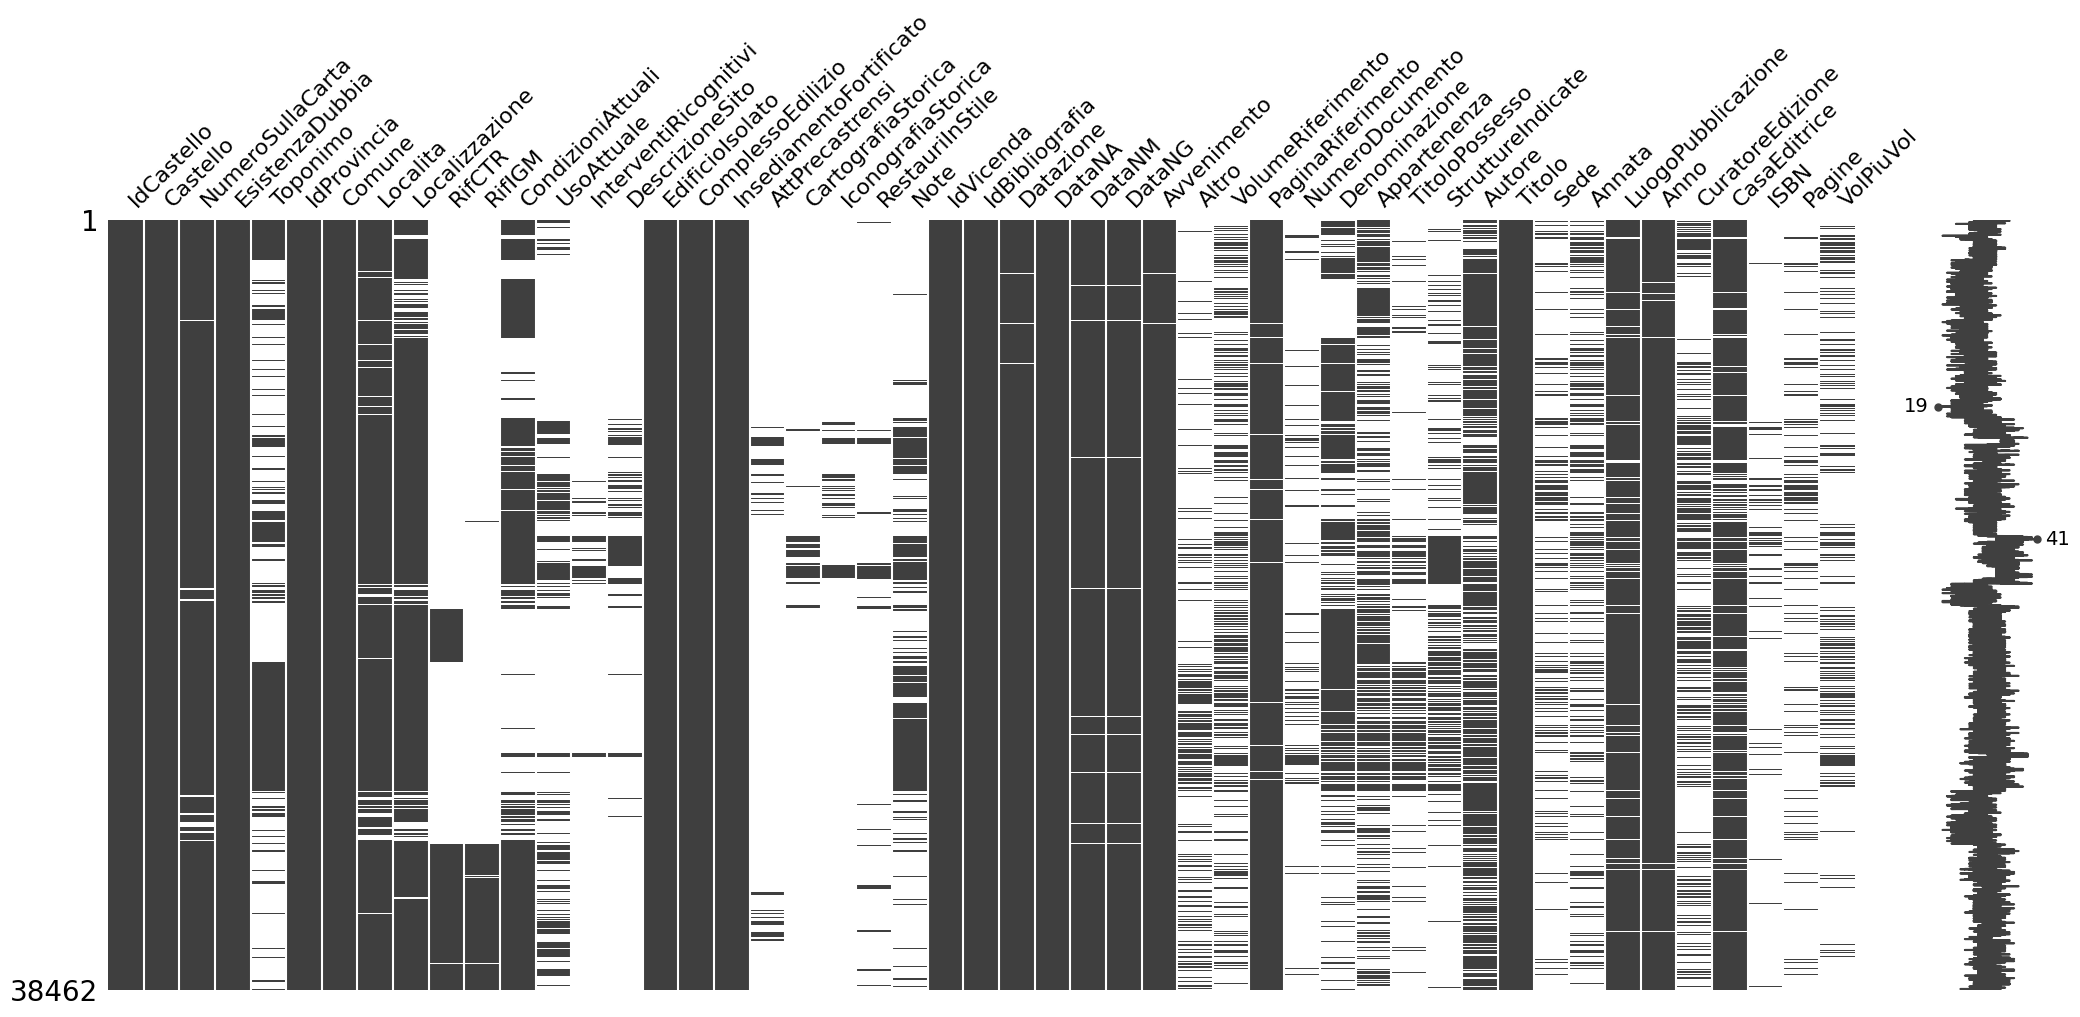

In [174]:
msno.matrix(merged)

<Axes: >

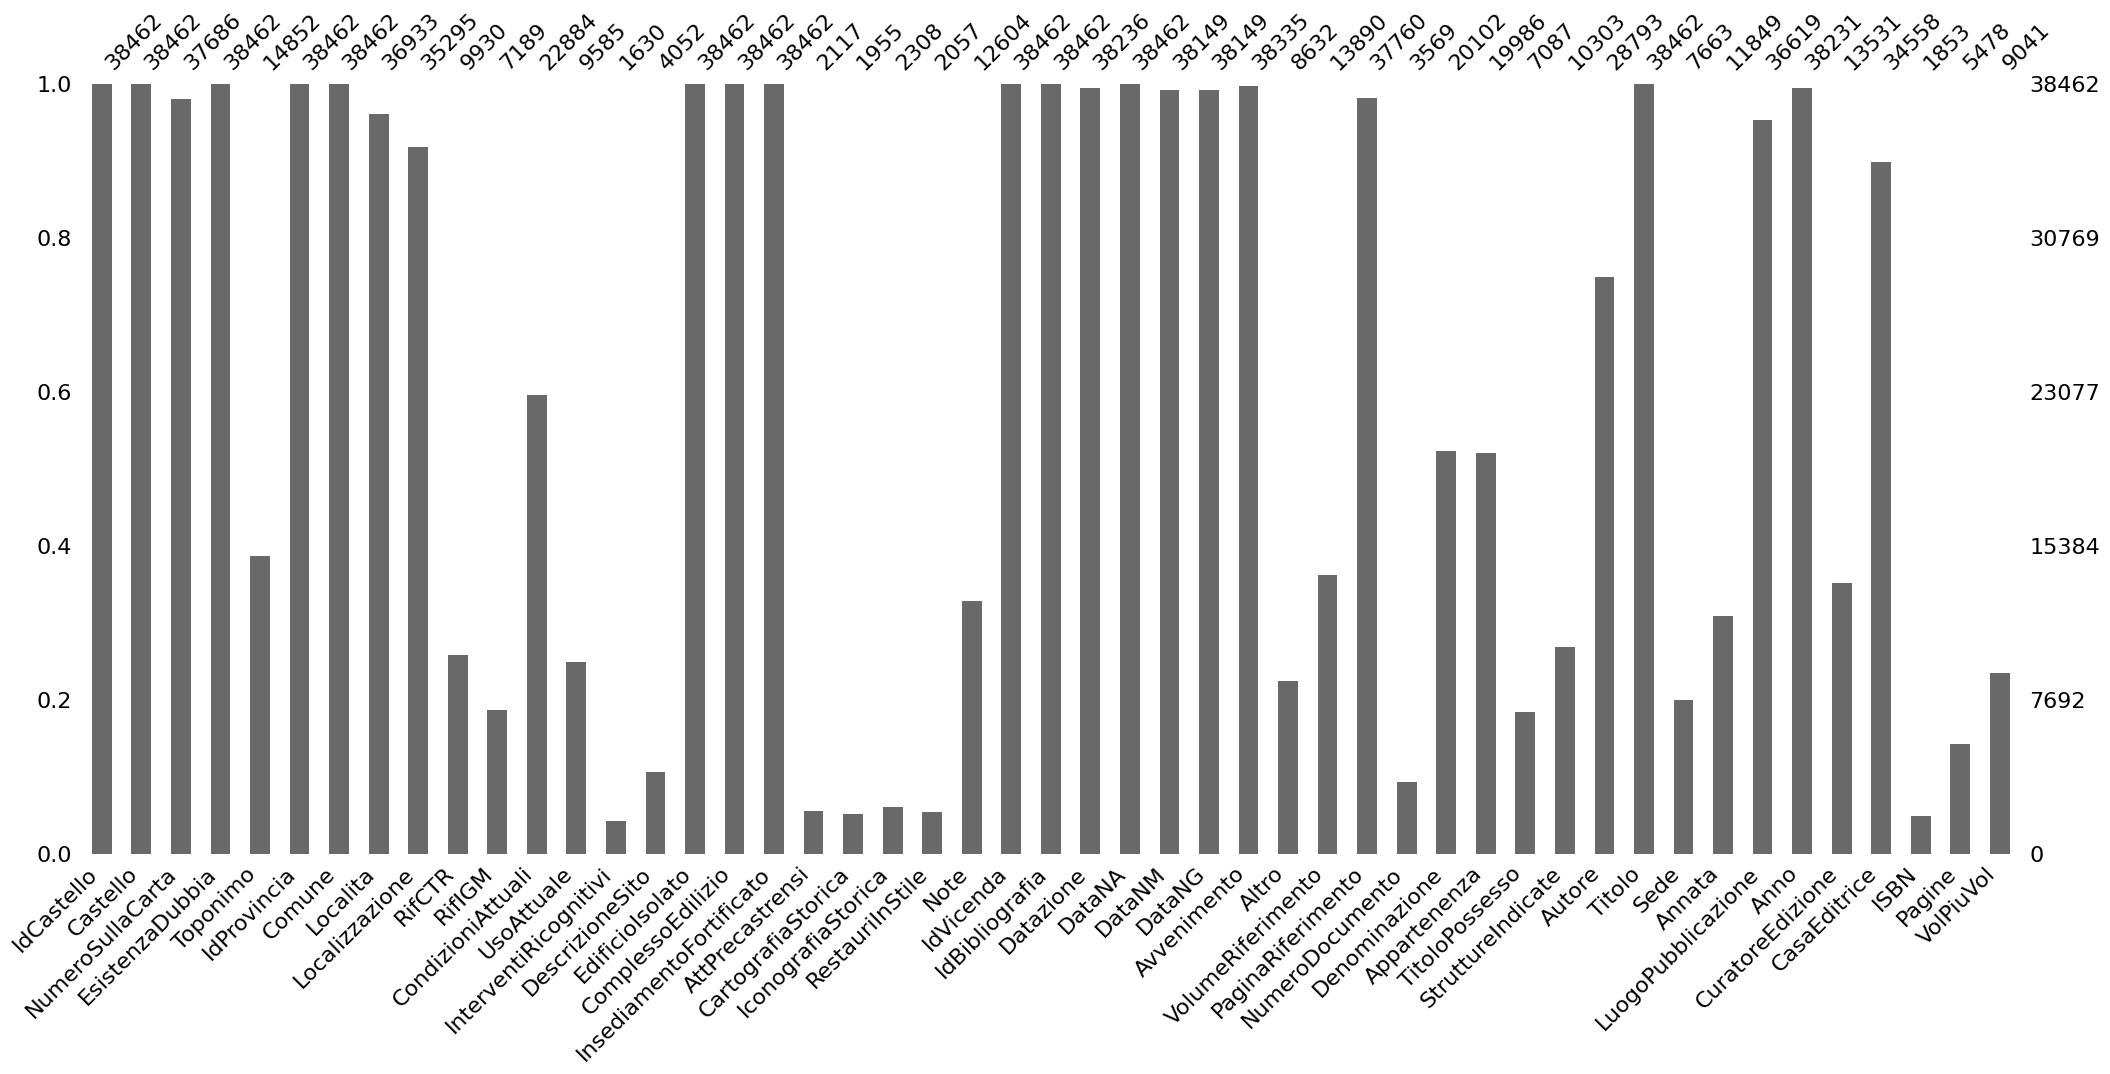

In [175]:
msno.bar(merged)